In [1]:
# 读取img文件夹下的图片
import os
import cv2
import numpy as np
from PIL import Image
from PIL import ImageGrab
from PIL import ImageOps
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from time import sleep
from random import randint
from grabscreen import get_hwnd_by_process_name


# 读取图片
def read_img(file_name):
    return cv2.imread(file_name)


# 显示图片
def show_img(img):
    plt.imshow(img)
    plt.show()

hwnd = get_hwnd_by_process_name(process_name="DarkSoulsIII.exe")

23
(1080, 1920, 4)


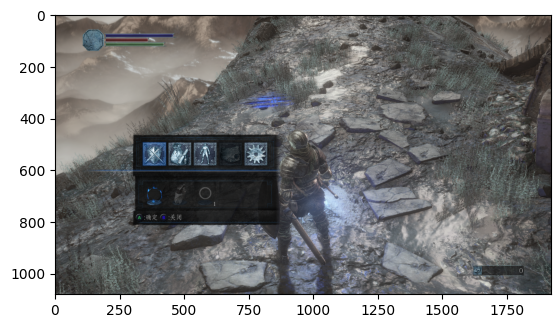

In [2]:
from grabscreen import grab_screen_by_process
img = grab_screen_by_process(hwnd)
print(img.shape)
show_img(img)

In [17]:
img = read_img('img/processed_screen_32.png')
# img = read_img('img/new_info_1.png')
# img = read_img('img/great_attack.png')
# img = read_img('wrong_start.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

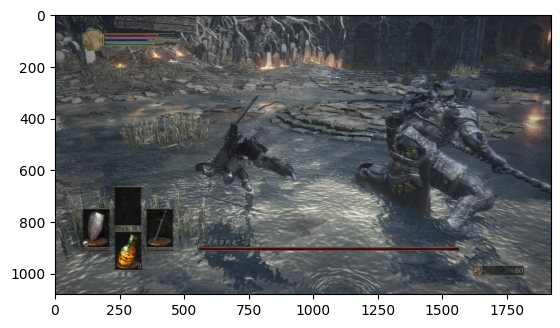

In [18]:
show_img(img_rgb)

In [4]:
window_size = (0, 0, 1920, 1080)  # 全屏

In [15]:
import numpy as np

img_rgb = np.load('wrong_start.npy')

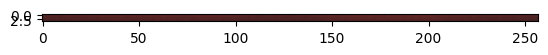

In [7]:
self_blood_window = (196, 80, 453, 84)  # 玩家血条区域
self_screen_color = img_rgb[self_blood_window[1]:self_blood_window[3],
                            self_blood_window[0]:self_blood_window[2]]
show_img(self_screen_color)

In [8]:
average_color = np.mean(self_screen_color, axis=0)

In [9]:
average_color

array([[80.75, 35.25, 35.25],
       [80.75, 36.  , 36.  ],
       [80.25, 35.75, 35.75],
       [79.5 , 35.25, 35.25],
       [80.25, 35.  , 35.  ],
       [80.25, 35.75, 35.75],
       [80.25, 35.75, 35.75],
       [82.  , 36.25, 36.25],
       [80.75, 35.25, 35.25],
       [79.75, 35.75, 35.75],
       [80.25, 36.25, 36.25],
       [81.5 , 35.75, 35.75],
       [83.25, 36.25, 36.25],
       [83.25, 37.  , 37.  ],
       [81.  , 36.  , 36.  ],
       [80.75, 35.5 , 35.5 ],
       [82.75, 35.25, 35.25],
       [82.25, 36.  , 36.  ],
       [81.5 , 35.75, 35.75],
       [83.75, 36.  , 36.  ],
       [83.  , 35.5 , 35.5 ],
       [83.  , 36.5 , 36.5 ],
       [82.5 , 36.25, 36.25],
       [83.5 , 35.75, 35.75],
       [85.25, 36.5 , 36.5 ],
       [84.75, 37.5 , 37.5 ],
       [83.5 , 37.  , 37.  ],
       [86.  , 37.25, 37.25],
       [84.  , 36.5 , 36.5 ],
       [84.75, 37.5 , 37.5 ],
       [85.75, 37.75, 37.75],
       [86.  , 36.75, 36.75],
       [86.5 , 35.75, 35.75],
       [84

In [10]:
def self_blood_count(color_image,
                     red_self_blood_threshold=75,
                     green_self_blood_threshold=45,
                     blue_self_blood_threshold=45):
    self_blood = 0
    average_color = np.mean(color_image, axis=0)
    for pixel in average_color:
        red_value = pixel[0]
        green_value = pixel[1]
        blue_value = pixel[2]
        if red_value > red_self_blood_threshold and green_value < green_self_blood_threshold and blue_value < blue_self_blood_threshold:
            self_blood += 1
    return self_blood


blood = self_blood_count(self_screen_color)
blood

257

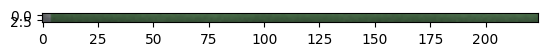

In [11]:
self_stamina_window = (192, 114, 416, 118)  # 玩家体力条区域
stamina_screen_color = img_rgb[self_stamina_window[1]:self_stamina_window[3],
                               self_stamina_window[0]:self_stamina_window[2]]
show_img(stamina_screen_color)

In [12]:
average_color = np.mean(stamina_screen_color, axis=0)

In [13]:
average_color

array([[ 88.25,  91.25,  91.75],
       [ 94.75,  97.5 ,  98.75],
       [ 99.5 , 102.25, 104.5 ],
       [104.  , 107.25, 109.75],
       [ 58.75,  87.  ,  58.75],
       [ 56.75,  83.75,  56.75],
       [ 58.5 ,  86.25,  58.5 ],
       [ 58.  ,  86.5 ,  58.  ],
       [ 57.75,  85.75,  57.75],
       [ 58.  ,  86.25,  58.  ],
       [ 59.75,  87.5 ,  59.75],
       [ 59.5 ,  87.  ,  59.5 ],
       [ 60.  ,  88.25,  60.  ],
       [ 58.75,  85.75,  58.75],
       [ 61.  ,  89.75,  61.  ],
       [ 60.25,  89.  ,  60.25],
       [ 60.  ,  87.75,  59.75],
       [ 59.5 ,  87.  ,  59.25],
       [ 61.5 ,  89.75,  61.25],
       [ 61.5 ,  89.  ,  61.25],
       [ 60.5 ,  88.25,  60.5 ],
       [ 61.75,  90.  ,  61.75],
       [ 61.25,  89.75,  61.25],
       [ 60.75,  88.5 ,  60.75],
       [ 61.  ,  88.5 ,  61.25],
       [ 60.5 ,  88.25,  60.75],
       [ 61.75,  89.75,  62.  ],
       [ 60.  ,  87.75,  60.25],
       [ 61.25,  89.5 ,  61.25],
       [ 61.  ,  89.25,  61.25],
       [ 6

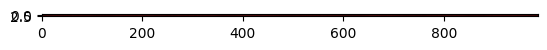

In [19]:
# boss_blood_window = (569, 932, 669, 936)  # Boss 血条区域
boss_blood_window = (561, 901, 1548, 905)  # Boss 血条区域
boss_screen_color = img_rgb[boss_blood_window[1]:boss_blood_window[3],
                            boss_blood_window[0]:boss_blood_window[2]]

show_img(boss_screen_color)

In [20]:
average_color = np.mean(boss_screen_color, axis=0)

In [21]:
for color in average_color:
    print(color)

[84.75 32.75 32.75]
[83.5  31.25 31.25]
[84.5  30.25 30.25]
[84.75 31.25 31.25]
[84.75 31.25 31.25]
[85.25 32.   32.  ]
[83.25 30.25 30.25]
[83.5 32.  32. ]
[86.25 34.25 34.25]
[86.75 33.5  33.5 ]
[87.75 32.5  32.5 ]
[86.25 32.5  32.5 ]
[85. 32. 32.]
[87.  33.5 33.5]
[88.75 32.75 32.75]
[88.25 33.5  33.5 ]
[88.75 34.5  34.5 ]
[89.25 33.25 33.25]
[88.75 34.   34.  ]
[88.25 34.75 34.75]
[88.25 34.75 34.75]
[88.25 33.   33.  ]
[91.25 33.25 33.25]
[91.5 35.5 35.5]
[90.   34.75 34.75]
[91.75 35.   35.  ]
[92. 36. 36.]
[91.75 36.25 36.25]
[91.  35.5 35.5]
[92.25 35.75 35.75]
[92.25 34.5  34.5 ]
[90.75 34.75 34.75]
[90.75 34.   34.  ]
[90.75 34.25 34.25]
[91.   34.75 34.75]
[92.25 36.5  36.5 ]
[90.5  33.75 33.75]
[91.   34.25 34.25]
[92.75 34.5  34.5 ]
[92.5 36.  36. ]
[92.75 36.5  36.5 ]
[91.25 35.   35.  ]
[90.5  34.25 34.25]
[90.5  34.25 34.25]
[91.75 36.   36.  ]
[92.25 34.25 34.25]
[93.25 35.5  35.5 ]
[92.25 36.25 36.25]
[93.75 37.   37.  ]
[92.25 35.25 35.25]
[91.75 34.   34.  ]
[92.25 